# Austin Real Estate Investment

### Where And Why To Buy

###### By Keith B, Vib Y, Karol C, and Aidin H

Our intent was to do an in-depth investigation of the housing market in Austin and study market-related variables to find which zip code would be most profitable to purchase a home in. 

The variables we looked at were: 

* House price by zip
* Household income by zip
* Current construction by zip
* Rate of change of construction by zip
* School ratings in each zip
* Types of businesses in zip



For information about housing prices and mortgage rates, we used: 

<img src="https://d360wc4uc6n3i9.cloudfront.net/assets/images/logos/v2/quandl-word-mark-fb41d14c7a394be8118897fb977de828.svg"  width="200" height="200">
<img src="http://zillow.mediaroom.com/image/ForScreen_RGB_ZillowLogo_Blue-Square-Horizontal-medium.jpg"  width="200" height="200">



To get the information about household income, we used the 2011 through 2016 American Community Surveys done by the US Census Bureau with some data cleaning help from their American FactFinder search.
<img src="https://lmi.workforcegps.org/-/media/Communities/lmi/Images/Icons-and-Logos/CB-AFF-Logo.ashx?h=118&la=en&w=335"  width="200" height="200">


For information about past and current construction projects in the city, we used 
<img src="https://data.austintexas.gov/api/assets/CFBD7709-F5FF-4A82-B530-A5B892DE7BE4/?/data-austintexas-gov.png"  width="200" height="200">

For school ratings, we used the GreatSchools.Org API.
<img src="https://www.greatschools.org/gk/wp-content/uploads/2016/07/GreatSchoolsLogo-social.png"  width="200" height="200">


For local business information, we accessed the Google Places API.
<img src="https://img.talkandroid.com/uploads/2015/07/google_maps_logo-450x450.png"  width="200" height="200">

Python packages we used: 

* Pandas
* Numpy
* Seaborn
* os, sys and inspect
* matplotlib
* folium
* selenium
* subprocess
* sklearn

After finding our data sources, our next step was to clean all of the data and merge it into one giant dataframe/csv file. From that file, we were able to do our analysis. 

In [5]:
import seaborn as sns
import pandas as pd
import os, sys, inspect
import numpy as np
import matplotlib.pyplot as plt
# add parent dir to system dir
currdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(currdir)
sys.path.insert(0, rootdir)

from src.plot import scatter
sns.set_style("whitegrid")

ffname = os.path.join(rootdir, "project-01", "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Median Income (dollars)", "Home Value Index"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 12]



One of the first assumptions that we wanted to test was to verify that home prices would go up in an area as the median income increased. To check this out, we made a scatter plot of Home Value vs Median Income for each zip code in Austin for each year between 2011 and 2016 (these were the only years we had income data for). 

Text(0.5,1,'Home Value vs Median Income, by year')

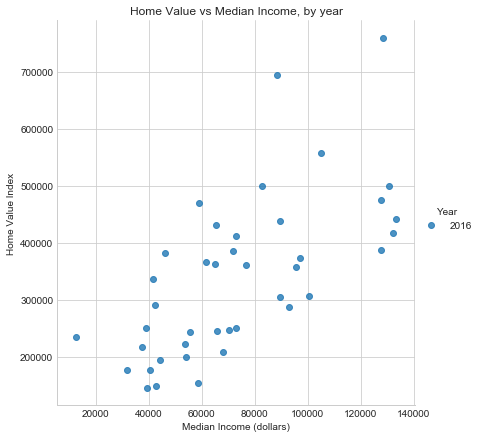

In [20]:
sns.lmplot(x="Median Income (dollars)", y="Home Value Index", data=real_estate_info, fit_reg=False, hue='Year', legend=True, size = 6)
plt.title("Home Value vs Median Income, by year")

Another common assumption that we wanted to analyze was that a neighborhood's income level could be determined by which businesses it contained. For example, if there were more Starbucks in a neighborhood, it was likely to be a more wealthy neighborhood. Whereas, an area in which there were a lot of liquor stores was likely to be a poorer neighborhood. 

In [16]:
ffname = os.path.join(rootdir, "project-01", "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Starbucks Count", "Median Income (dollars)"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 1]
real_estate_info = real_estate_info.loc[real_estate_info["Year"] == 2016]

Text(0.5,1,'Income vs Number of Starbucks')

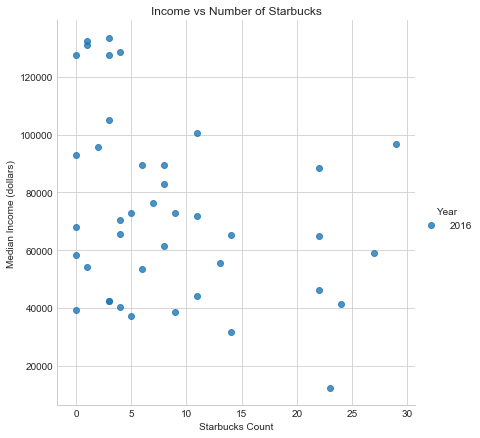

In [19]:
sns.lmplot(x="Starbucks Count", y="Median Income (dollars)", data=real_estate_info, fit_reg=False, hue='Year', legend=True, size = 6)
plt.title("Income vs Number of Starbucks")

In [ ]:
ffname = os.path.join(rootdir, "project-01", "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Liquor Store Count", "Median Income (dollars)"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 1]
real_estate_info = real_estate_info.loc[real_estate_info["Year"] == 2016]

Text(0.5,1,'Income vs Number of Liquor Stores')

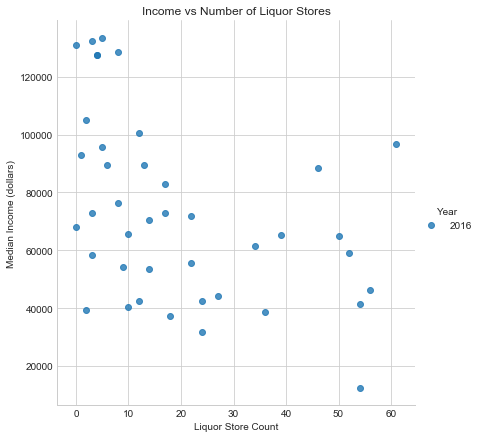

In [21]:
sns.lmplot(x="Liquor Store Count", y="Median Income (dollars)", data=real_estate_info, fit_reg=False, hue='Year', legend=True, size = 6)
plt.title("Income vs Number of Liquor Stores")

However, based on the Austin area, both hypotheses seem to have been disproven as there appears to be little or no correlation between income and the number of these types of businesses in a given zip code. 

Another element of the housing market that we wanted to investigate was the effect of new construction on the prices in a zip code. To start this analysis, we wanted to look at general trends in the amount of construction over time. 

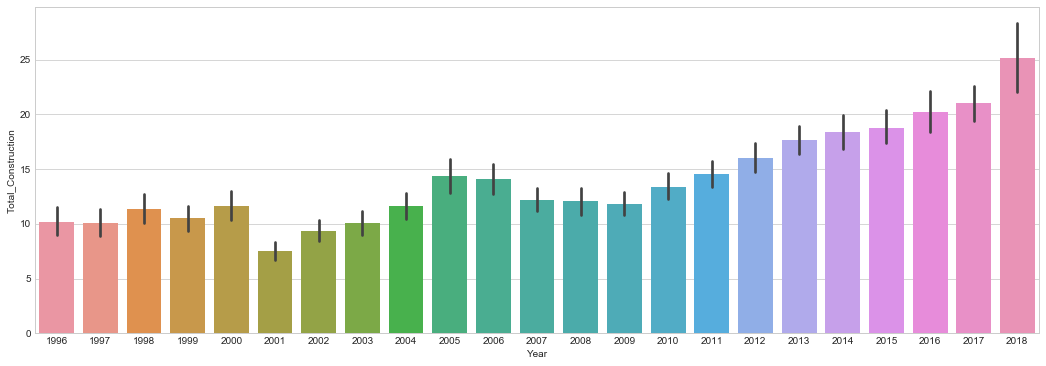

In [15]:
ffname = os.path.join(rootdir, "project-01", "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Total_NewConstructions", "Total_RemodelsRepairs"])

real_estate_info["Total_Construction"] = real_estate_info["Total_NewConstructions"] + real_estate_info["Total_RemodelsRepairs"]

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x="Year", y="Total_Construction", data=real_estate_info, ax=ax)